In [164]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px
import numpy as np

In [264]:
import os
os.getcwd()

'C:\\Users\\Laptop\\PycharmProjects\\RNN_LSTM_Time_Series\\.venv\\Scripts'

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.layers import Dense
from keras.models import Sequential

In [23]:
# Download required NLTK assets...

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Laptop\AppData\Roaming\nltk_data...


True

In [10]:
#Create stopword collection to use in tokenization...

stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [18]:
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [31]:
#Initialize WordNet lemmatizer object.
# Construct Lematize function that takes as input a sample of text and lematizes it using the correct Part of Speach tag.

lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            pos = pos_tag([i.strip()])
            word = lemmatizer.lemmatize(i.strip(),get_simple_pos(pos[0][1]))
            final_text.append(word.lower())
    return " ".join(final_text)      

In [231]:
# Test the current workflow and functions...

text1 = "If you do not provide an a-priori dictionary and you do not use an analyzer that does some kind of feature selection then the number of features will be equal to the vocabulary size found by analyzing the data."
text2 = "Of all the reasons Python is a hit with developers, one of the biggest is its broad and ever-expanding selection of third-party packages. Convenient toolkits for everything from ingesting and formatting data to high-speed math and machine learning are just an import or pip install away."
text = [text1, text2]


processed_text = []
for sent in text:
    print(f"Sentance prior to processing: \n{sent}\n")
    text_lem = lemmatize_words(sent)
    print(f"Sentance post processing: \n{text_lem}\n")
    processed_text.append(text_lem)

cv = CountVectorizer(min_df=0.0,max_df=1,binary=False,ngram_range=(1,1))
c = cv.fit_transform(processed_text)


print("\nCount per processed word... \n")
count_array = c.toarray()
df = pd.DataFrame(data=c.toarray(), columns = cv.get_feature_names_out())
df

Sentance prior to processing: 
If you do not provide an a-priori dictionary and you do not use an analyzer that does some kind of feature selection then the number of features will be equal to the vocabulary size found by analyzing the data.

Sentance post processing: 
provide a-priori dictionary use analyzer kind feature selection number feature equal vocabulary size found analyze data.

Sentance prior to processing: 
Of all the reasons Python is a hit with developers, one of the biggest is its broad and ever-expanding selection of third-party packages. Convenient toolkits for everything from ingesting and formatting data to high-speed math and machine learning are just an import or pip install away.

Sentance post processing: 
reason python hit developers, one big broad ever-expanding selection third-party packages. convenient toolkits everything ingest format data high-speed math machine learn import pip install away.

['provide a-priori dictionary use analyzer kind feature selectio

,analyze,analyzer,away,big,broad,convenient,developers,dictionary,equal,ever,...,priori,provide,python,reason,size,speed,third,toolkits,use,vocabulary
0,1,1,0,0,0,0,0,1,1,0,...,1,1,0,0,1,0,0,0,1,1
1,0,0,1,1,1,1,1,0,0,1,...,0,0,1,1,0,1,1,1,0,0


# Mental Health Data Classification & Analysis...

## workflow...
- Read in MentaHealth Data
- Perform preprocessing and analysis on data
- Fit data to MultiNomial Naive Bayes model and conduct out of sample testing.
- Construct Neural Network model
- Fit data to Neural Network model and conduct out of sample testing.
- Compare results 

In [247]:
df = pd.read_csv(r"C:\Users\Laptop\OneDrive\Desktop\mental_health.csv")

In [248]:
df.head(5)
len(df)

27977

In [249]:
# Assess balance of dataset...
# Data is well balanced and doesnt need adjusting prior to processing

df = df[:20000]
print(f"Portion of dataset tagged as DANGEROUS ('1'): {df[df.label==1].shape[0] / df.shape[0]*100}%")
print(f"Portion of dataset tagged as NOT DANGEROUS ('0'): {df[df.label==0].shape[0] / df.shape[0]*100}%")

Portion of dataset tagged as DANGEROUS ('1'): 49.504999999999995%
Portion of dataset tagged as NOT DANGEROUS ('0'): 50.495000000000005%


In [250]:
'''
PRE-PROCESSING 

Apply Lematization function to 'text' column - In this case the data appears to be semi-processed but I 
perform this for good measure.

! NOTE - Depending on hardware, this can take a while. Adjust the above code to reduce sample count if needed to 
reduce runtime !
'''

df["new_text"] = df.text.apply(lemmatize_words)

In [251]:
df.head()

,text,label,new_text
0,dear american teens question dutch person hear...,0,dear american teen question dutch person heard...
1,nothing look forward lifei dont many reasons k...,1,nothing look forward lifei dont many reason ke...
2,music recommendations im looking expand playli...,0,music recommendation im look expand playlist u...
3,im done trying feel betterthe reason im still ...,1,im do try feel betterthe reason im still alive...
4,worried year old girl subject domestic physic...,1,worried year old girl subject domestic physica...


In [252]:
# We don't need the 'text' column anymore...

df.drop('text', axis=1, inplace=True)

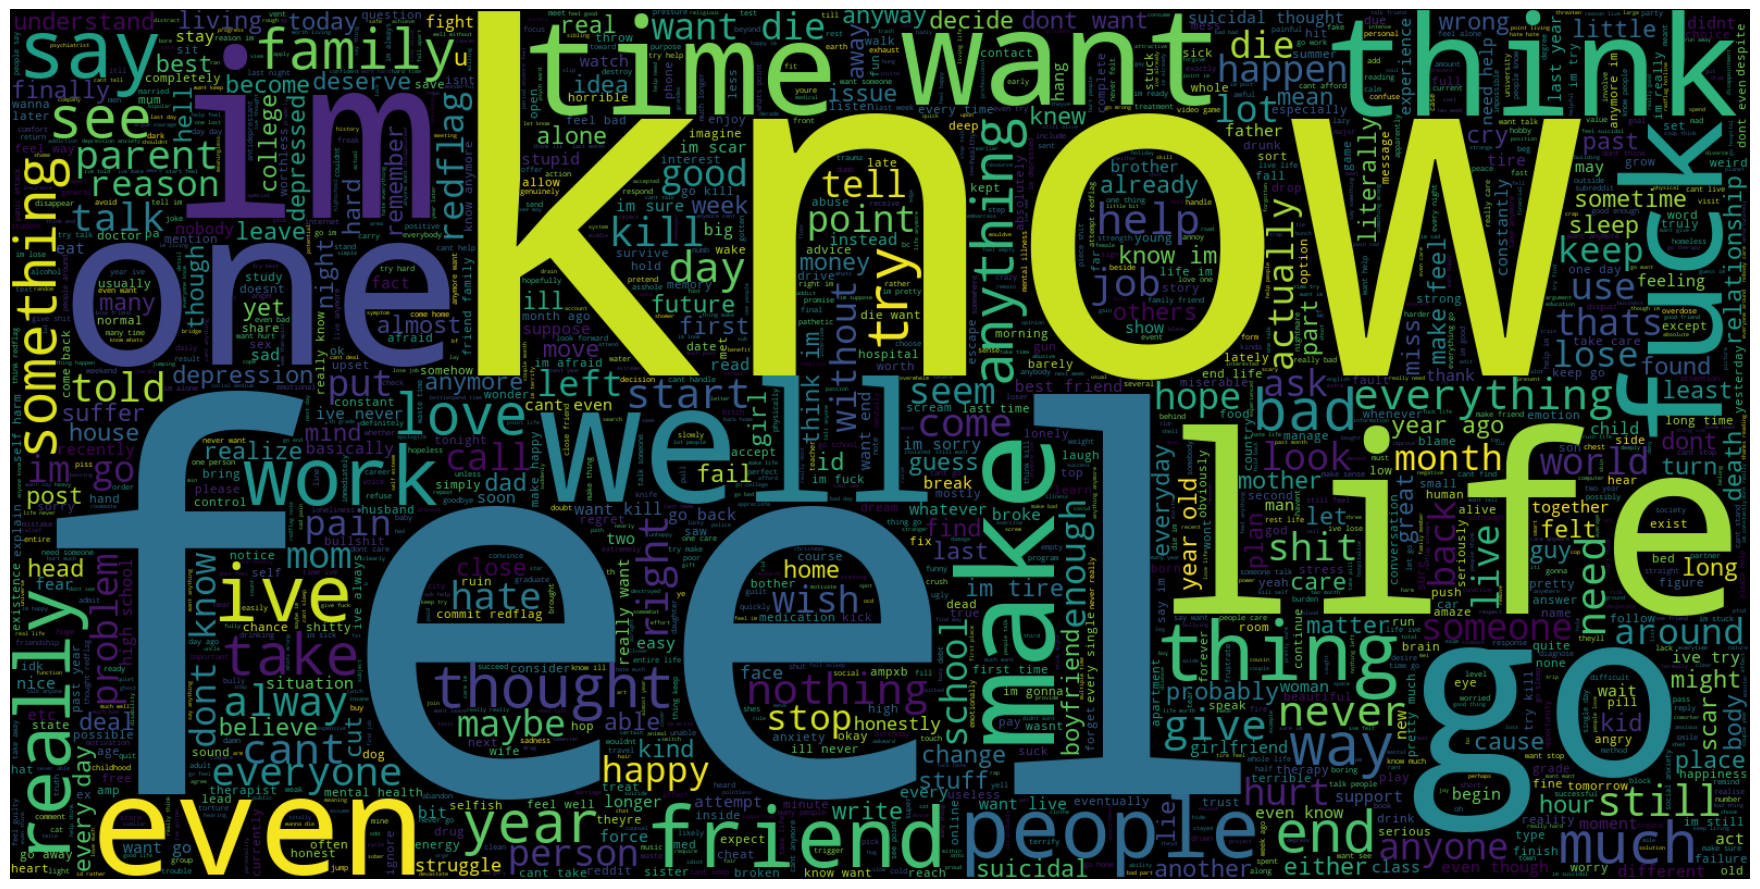

In [253]:
# WordCloud to visualize some of the most impactful words in the DANGEROUS messages...

plt.figure(figsize = (20,20))
wc = WordCloud(width = 1600 , height = 800 , max_words = 2000).generate(" ".join(df[df.label==1].new_text))
plt.axis("off")
plt.imshow(wc , interpolation = 'bilinear')

In [254]:
# Build CountVectorized matrix for features in processed 'new_text' column...

cv = CountVectorizer(ngram_range=(1,2))

x = cv.fit_transform(df.new_text)

In [255]:
# Assign test and train datasets...

train_text , test_text ,train_category , test_category = train_test_split(x, df.label, test_size = 0.2 , random_state = 0)

In [256]:
# Build and fit Naive Bayes model to training data...

mnb=MultinomialNB()
mnb_try = mnb.fit(train_text, train_category)
pred = mnb.predict(test_text)

In [262]:
# Compute accuracy of NB model...

acc = accuracy_score(test_category, pred)
print(f"NB Model Accuracy: {acc*100}%")

NB Model Accuracy: 81.8%


In [259]:
# Print summary performance report...

print(classification_report(test_category,pred,target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.98      0.66      0.79      2067
           1       0.73      0.98      0.84      1933

    accuracy                           0.82      4000
   macro avg       0.85      0.82      0.81      4000
weighted avg       0.86      0.82      0.81      4000



In [260]:
'''
NEURAL NETWORK MODEL:

Multi-layer Neural Network ('NN') with 5 layers - described in the below printout.

Units dentoe the number of Neurons in each layer. 

'relu' refers to the Rectified Linear activation function used.

Output layer uses a Sigmoid activation function with one Neuron as we are attempting to map each 
input array with a corresponsing value of 0 or 1.

'''

model = Sequential()
model.add(Dense(units = 100 , activation = 'relu' , input_dim = train_text.shape[1]))
model.add(Dense(units = 50 , activation = 'relu'))
model.add(Dense(units = 25 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu'))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               70223300  
                                                                 
 dense_11 (Dense)            (None, 50)                5050      
                                                                 
 dense_12 (Dense)            (None, 25)                1275      
                                                                 
 dense_13 (Dense)            (None, 10)                260       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 70229896 (267.91 MB)
Trainable params: 70229896 (267.91 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [261]:
# Fit the model to our training data (converted to an array as TensorFlow is limited with regards to input types...

model.fit(train_text.toarray(), train_category, epochs = 5)

MemoryError: Unable to allocate 83.7 GiB for an array with shape (16000, 702232) and data type int64

In [139]:
# Run model on testing data...

NN_Pred = model.predict(test_text.toarray())

63/63 [==============================] - 2s 11ms/step


In [143]:
# Round each prediction output to a corresponding label value as we are dealing with discrete outcomes...

NN_Pred_Round = np.around(NN_Pred, decimals = 0)

In [144]:
# Compute accuracy score...

accuracy_score(NN_Pred_Round, test_category)

0.909

In [145]:
# Print classification report for NN model...

print(classification_report(test_category,aidecpred,target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1036
           1       0.88      0.93      0.91       964

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000

